# Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

## 1. - Paramètres par défaut

In [2]:
range?

Init signature: range(self, /, *args, **kwargs)
Docstring:     
range(stop) -> range object
range(start, stop[, step]) -> range object

Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted!  range(4) produces 0, 1, 2, 3.
These are exactly the valid indices for a list of 4 elements.
When step is given, it specifies the increment (or decrement).
Type:           type
Subclasses:     


In [3]:
print(list(range(10)))
print(list(range(1, 10)))
print(list(range(1, 10, 2)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7, 9]


In [4]:
def somme(iterable, start=0):
    return sum(iterable, start)

In [5]:
# appel sans le paramètre optionnel
somme([1,2,3])

6

In [6]:
# appel avec le paramètre optionnel (par position)
somme([1,2,3], 10)

16

In [7]:
# appel avec paramètre optionnel (par keyword)
somme([1,2,3], start=10)

16

In [8]:
# SyntaxError: positional argument follows keyword argument
# somme(start=10, [1,2,3])

In [9]:
somme(start=10, iterable=[1,2,3])

16

### Example lecture CSV avec Pandas
Data from Toulouse: https://data.toulouse-metropole.fr/explore/dataset/38-station-meteo-toulouse-parc-jardin-des-plantes/information/

#### doc pandas

In [10]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    sep=<no_default>,
    delimiter=None,
    header='infer',
    names=<no_default>,
    index_col=None,
    usecols=None,
    squeeze=None,
    prefix=<no_default>,
    mangle_dupe_cols=True,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=None,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression: 'CompressionOptions' = 'infer',
    thousands=None,
    decimal: 'str' = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
    esc

In [11]:
# FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
# dfMeteo = pd.read_csv('38-station-meteo-toulouse-parc-jardin-des-plantes.csv', ';')
columns = [
 'heure_utc',
 'datetime_fuseau',
 'temperature_en_degre_c',
 'humidite',
'pression',
 'pluie',
'pluie_la_plus_intense_durant_1_min',
 'direction_du_vecteur_moyen_de_vent',
 'force_moyenne_du_vecteur_de_vent',
 'direction_du_vecteur_de_vent_max',
 'force_du_vecteur_de_vent_max',
 'direction_du_vecteur_vent_moyen',
 'direction_du_vecteur_de_rafale_de_vent_max',
 'force_moyenne_du_vecteur_vent',
 'force_rafale_max',
 'type_station',
 ]
dfMeteo = pd.read_csv('38-station-meteo-toulouse-parc-jardin-des-plantes.csv', 
        delimiter=';', encoding='UTF-8',
        usecols=columns,
        parse_dates=['heure_utc',  'datetime_fuseau'],
        ## columns with mixed contents: force data type
        # dtype={'temp_s1_q1': 'str', 'temp_s2q1': 'str', 'temp_s1q2': 'str', 'temp_s2q2': 'str', 'temp_s1q3': 'str', 'temp_s2q3': 'str'}
)
dfMeteo = dfMeteo[columns]
dfMeteo

,heure_utc,datetime_fuseau,temperature_en_degre_c,humidite,pression,pluie,pluie_la_plus_intense_durant_1_min,direction_du_vecteur_moyen_de_vent,force_moyenne_du_vecteur_de_vent,direction_du_vecteur_de_vent_max,force_du_vecteur_de_vent_max,direction_du_vecteur_vent_moyen,direction_du_vecteur_de_rafale_de_vent_max,force_moyenne_du_vecteur_vent,force_rafale_max,type_station
0,2022-05-07 01:00:00+02:00,NaN,17.6,49.0,0.0,0.0,0.0,146.0,1.0,13.0,5.0,292.0,292.5,1.0,5.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
3,2022-05-04 01:00:00+02:00,NaN,13.6,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-01-11 01:00:00+01:00,NaN,-1.9,66.0,0.0,0.0,0.0,148.0,5.0,14.0,11.0,296.0,315.0,5.0,11.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56282,2023-06-20 04:45:00+02:00,NaN,21.4,60.0,96.0,0.0,0.0,170.0,0.0,11.0,6.0,340.0,247.5,0.0,6.0,0.0
56283,2023-06-20 05:30:00+02:00,NaN,21.4,61.0,96.0,0.0,0.0,175.0,1.0,11.0,8.0,350.0,247.5,1.0,8.0,0.0
56284,2023-06-20 08:30:00+02:00,NaN,20.9,55.0,96.0,0.0,0.0,22.0,0.0,2.0,3.0,44.0,45.0,0.0,3.0,0.0
56285,NaN,2023-06-20 08:45:00+02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [12]:
dfMeteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56287 entries, 0 to 56286
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   heure_utc                                   44591 non-null  object 
 1   datetime_fuseau                             9356 non-null   object 
 2   temperature_en_degre_c                      44591 non-null  float64
 3   humidite                                    44591 non-null  float64
 4   pression                                    44591 non-null  float64
 5   pluie                                       44591 non-null  float64
 6   pluie_la_plus_intense_durant_1_min          44591 non-null  float64
 7   direction_du_vecteur_moyen_de_vent          44591 non-null  float64
 8   force_moyenne_du_vecteur_de_vent            44591 non-null  float64
 9   direction_du_vecteur_de_vent_max            44591 non-null  float64
 10  force_du_v

In [13]:
dfMeteo.heure_utc[0]

datetime.datetime(2022, 5, 7, 1, 0, tzinfo=tzoffset(None, 7200))

In [14]:
# was usefull to build dict from columns indexes mentionned in the warning
# { n: 'str' for n in dfMeteo.columns[[69,75,87,93,105,111]]}

In [15]:
dfMeteo.heure_utc = dfMeteo.heure_utc.mask(dfMeteo.heure_utc.isna(), pd.NaT)

In [16]:
# some cleaning todo before asking that ....
dfMeteo.loc[~dfMeteo.heure_utc.isna(), 'heure_utc'].agg(['min', 'max'])

min   2019-06-27 16:15:00+02:00
max   2023-06-20 09:00:00+02:00
Name: heure_utc, dtype: datetime64[ns, tzoffset(None, 7200)]

### Enquête sur le fichier CSV perdu (ou pas)

In [17]:
f = open('38-station-meteo-toulouse-parc-jardin-des-plantes.csv', encoding='UTF-8')
print(repr(f))
f.close()

<_io.TextIOWrapper name='38-station-meteo-toulouse-parc-jardin-des-plantes.csv' mode='r' encoding='UTF-8'>


In [18]:
current_dir = Path('.')
current_dir

WindowsPath('.')

In [19]:
current_dir.absolute()

WindowsPath('C:/Users/Matthias/Documents/Formations/Python/Stage202306perf/Functions')

In [20]:
list(current_dir.iterdir())

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('38-station-meteo-toulouse-parc-jardin-des-plantes.csv'),
 WindowsPath('functions.ipynb')]

In [21]:
list(current_dir.glob('**/*.csv'))

[WindowsPath('38-station-meteo-toulouse-parc-jardin-des-plantes.csv'),
 WindowsPath('.ipynb_checkpoints/38-station-meteo-toulouse-parc-jardin-des-plantes-checkpoint.csv')]

### Cas des listes, set, dict

#### Mauvaise pratique

In [22]:
def letters_from_word(word, previous_set=set()):
    new_letters = set(word)
    previous_set.update(new_letters)
    return previous_set

In [23]:
# sequence 1
s1 = letters_from_word("toulouse")
print(s1)
s2 = letters_from_word("pau", s1)
print(s2)

{'t', 'e', 'o', 's', 'u', 'l'}
{'t', 'o', 's', 'e', 'p', 'a', 'u', 'l'}


In [24]:
# sequence 2
s1 = letters_from_word("paris")
print(s1)
s2 = letters_from_word("lyon", s1)
print(s2)

{'t', 'o', 's', 'e', 'p', 'r', 'i', 'a', 'u', 'l'}
{'t', 'o', 's', 'n', 'e', 'p', 'r', 'i', 'y', 'a', 'u', 'l'}


#### Good solution

In [25]:
def letters_from_word(word, previous_set=None):
    if previous_set is None:
        previous_set = set()
    new_letters = set(word)
    previous_set.update(new_letters)
    return previous_set

In [26]:
# sequence 1
s1 = letters_from_word("toulouse")
print(s1)
s2 = letters_from_word("pau", s1)
print(s2)

{'t', 'e', 'o', 's', 'u', 'l'}
{'t', 'o', 's', 'e', 'p', 'a', 'u', 'l'}


In [27]:
# sequence 2
s1 = letters_from_word("paris")
print(s1)
s2 = letters_from_word("lyon", s1)
print(s2)

{'r', 'p', 'i', 'a', 's'}
{'o', 's', 'n', 'r', 'p', 'i', 'y', 'a', 'l'}


## 2. - Paramètres en nombre variable
- by position: *args, 
- by keyword: **kwargs

### Exemple matplotlib

In [28]:
# zip(*iterables)
print(list(zip()))
print(list(zip("Toulouse")))
print(list(zip("Toulouse", [1,2,3,5])))

[]
[('T',), ('o',), ('u',), ('l',), ('o',), ('u',), ('s',), ('e',)]
[('T', 1), ('o', 2), ('u', 3), ('l', 5)]


In [29]:
x = np.linspace(0, 2*np.pi, 10000)
y1 = np.sin(x)
y2 = np.cos(x)

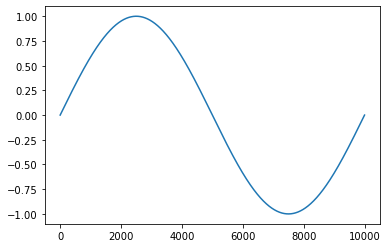

In [30]:
# Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
plt.plot(y1)

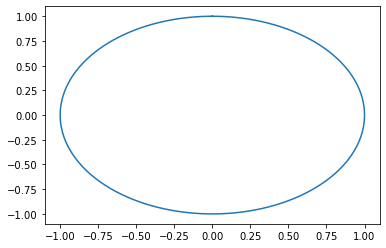

In [31]:
# y1 is interpreted as x coordinates
plt.plot(y1,y2)

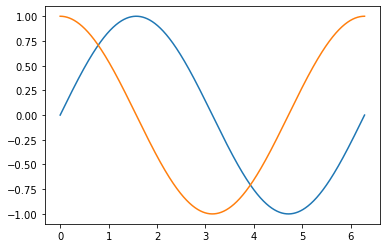

In [32]:
plt.plot(x, y1, x, y2)

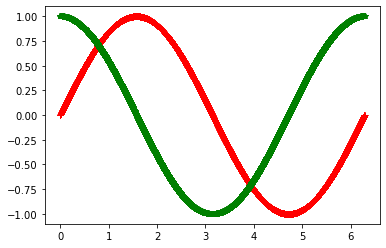

In [33]:
plt.plot(x, y1, 'r+', x, y2, 'g*')

C:\Users\Matthias\AppData\Local\Temp\ipykernel_19440\1954639241.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y1, 'r', x, y2, 'g', color='blue', linestyle='dashed')
C:\Users\Matthias\AppData\Local\Temp\ipykernel_19440\1954639241.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, y1, 'r', x, y2, 'g', color='blue', linestyle='dashed')


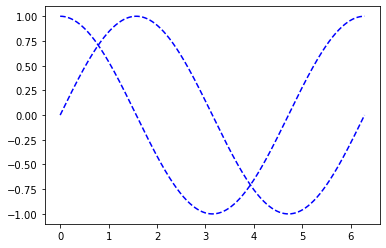

In [34]:
plt.plot(x, y1, 'r', x, y2, 'g', color='blue', linestyle='dashed')

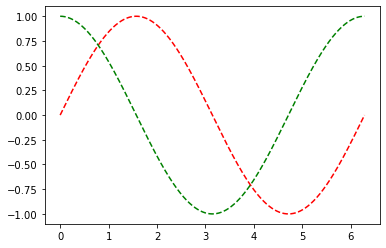

In [35]:
plt.plot(x, y1, 'r', x, y2, 'g', linestyle='dashed')

### Exemple function definition
**NB**: code using pattern matching (python 3.10+)
https://peps.python.org/pep-0636/

In [1]:
def letters_from_one_word_to_dict(word):
    res = {}
    for l in word:
        if l in res:
            res[l] += 1
        else:
            res[l] =1
    return res
            
def update_dict_letters(letter_dict1, letter_dict2):
    # update letter counts of letter_dict1 with letter_dict2
    for l,c in letter_dict2.items():
        if l in letter_dict1:
            letter_dict1[l] += c
        else:
            letter_dict1[l] = c
    return letter_dict1

def letters_from_word(a, *word, b, previous_res=None, **kwargs):
    """returns letters form a series of word as a set by default 
    or a dict with the number of letters
    
    Parameters:
    -----------
    - a: dummy positional argument
    - word: word1, word2, ... wordn: words to decompose
    - b: dummy keyword argument
    - previous_res: previous set or dict to accumulate with this execution
        default value: empt set or empty dict
    - kwargs: other options (cf Other Options chapter)
    
    Other Options:
    --------------
    - case: deal with letters with case sensitive or insensitive (default)
        default value: False
    - count: count letters (result is a dict) or not (result is a set)
        default value: False
    """
    # Debug args
    print("Arg a", a, type(a), sep=' : ')
    print("Arg word", word, type(word), sep=' : ')
    print("Arg b", b, type(b), sep=' : ')
    print("Arg previous_res", previous_res, type(previous_res), sep=' : ')
    print("Arg kwargs", kwargs, type(kwargs), sep=' : ')
    # Impl function (ignore a and b)
    # options
    case_sensitive = False
    count = False
    for option_name, option_value in kwargs.items():
        match option_name:
            case "case": 
                case_sensitive = option_value
            case "count":
                count = option_value
            case _:
                raise NameError(f"Unknown option: {option_name}")
    print(f"Options decrypted: case={case_sensitive}, count={count}")
    if previous_res is None:
        previous_res = {} if count else set()
    for w in word:
        if not case_sensitive:
            w = w.lower()
        if count:
            new_letters = letters_from_one_word_to_dict(w)
            update_dict_letters(previous_res, new_letters)
        else:
            new_letters = set(w)
            previous_res.update(new_letters)
    return previous_res

In [2]:
# letters_from_word() # missing 1 required positional argument: 'a'
# letters_from_word(1) # missing 1 required keyword-only argument: 'b'
letters_from_word(1, b=2)

Arg a : 1 : <class 'int'>
Arg word : () : <class 'tuple'>
Arg b : 2 : <class 'int'>
Arg previous_res : None : <class 'NoneType'>
Arg kwargs : {} : <class 'dict'>
Options decrypted: case=False, count=False


set()

In [3]:
letters_from_word(1, "Toulouse", "Lyon", "Paris", b=2, case=False, count=False)

Arg a : 1 : <class 'int'>
Arg word : ('Toulouse', 'Lyon', 'Paris') : <class 'tuple'>
Arg b : 2 : <class 'int'>
Arg previous_res : None : <class 'NoneType'>
Arg kwargs : {'case': False, 'count': False} : <class 'dict'>
Options decrypted: case=False, count=False


{'a', 'e', 'i', 'l', 'n', 'o', 'p', 'r', 's', 't', 'u', 'y'}

In [4]:
letters_from_word(1, "Toulouse", "Lyon", "Paris", b=2, case=True, count=False)

Arg a : 1 : <class 'int'>
Arg word : ('Toulouse', 'Lyon', 'Paris') : <class 'tuple'>
Arg b : 2 : <class 'int'>
Arg previous_res : None : <class 'NoneType'>
Arg kwargs : {'case': True, 'count': False} : <class 'dict'>
Options decrypted: case=True, count=False


{'L', 'P', 'T', 'a', 'e', 'i', 'l', 'n', 'o', 'r', 's', 'u', 'y'}

In [5]:
letters_from_word(1, "Toulouse", "Lyon", "Paris", b=2, case=False, count=True)

Arg a : 1 : <class 'int'>
Arg word : ('Toulouse', 'Lyon', 'Paris') : <class 'tuple'>
Arg b : 2 : <class 'int'>
Arg previous_res : None : <class 'NoneType'>
Arg kwargs : {'case': False, 'count': True} : <class 'dict'>
Options decrypted: case=False, count=True


{'t': 1,
 'o': 3,
 'u': 2,
 'l': 2,
 's': 2,
 'e': 1,
 'y': 1,
 'n': 1,
 'p': 1,
 'a': 1,
 'r': 1,
 'i': 1}

In [6]:
letters_from_word(1, "Toulouse", "Lyon", "Paris", b=2, case=True, count=True)

Arg a : 1 : <class 'int'>
Arg word : ('Toulouse', 'Lyon', 'Paris') : <class 'tuple'>
Arg b : 2 : <class 'int'>
Arg previous_res : None : <class 'NoneType'>
Arg kwargs : {'case': True, 'count': True} : <class 'dict'>
Options decrypted: case=True, count=True


{'T': 1,
 'o': 3,
 'u': 2,
 'l': 1,
 's': 2,
 'e': 1,
 'L': 1,
 'y': 1,
 'n': 1,
 'P': 1,
 'a': 1,
 'r': 1,
 'i': 1}

In [7]:
try:
    letters_from_word(1, "Toulouse", "Lyon", "Paris", b=2, case=True, count=False, toto="Tutu")
except NameError as e:
    print("Caugth exception NameError  with message:", e)

Arg a : 1 : <class 'int'>
Arg word : ('Toulouse', 'Lyon', 'Paris') : <class 'tuple'>
Arg b : 2 : <class 'int'>
Arg previous_res : None : <class 'NoneType'>
Arg kwargs : {'case': True, 'count': False, 'toto': 'Tutu'} : <class 'dict'>
Caugth exception NameError  with message: Unknown option: toto
